# Plot SIF Level 2 data in North America for a given month


In [1]:
import sys
sys.path.insert(0, "../src")

In [2]:
import numpy as np
import xarray as xr
import plot

In [4]:
extents = (-125, -65, 22, 58)
with xr.open_dataset("../data/exp_pro/OCO2_Lite_SIF740.nc") as ds:
    ds = ds.where(ds.time.dt.year == 2016, drop=True)
    ds = ds.where(ds.time.dt.month == 7, drop=True)
    bounds = (
        (ds.lon >= extents[0])
        & (ds.lon <= extents[1])
        & (ds.lat >= extents[2])
        & (ds.lat <= extents[3])
    )
    ds = ds.where(bounds, drop=True)
    m_start = np.datetime_as_string(ds.time.min(), unit="D")
    m_end = np.datetime_as_string(ds.time.max(), unit="D")
    df = ds.to_dataframe().reset_index()

df

,time,sif,sif_var,lon,lat
0,2016-07-01 17:43:00.898437504,0.404351,0.277991,-70.915588,41.704529
1,2016-07-01 17:43:01.226562560,0.139903,0.251031,-70.922363,41.722900
2,2016-07-01 17:43:01.257812480,0.845830,0.248645,-70.916565,41.713379
3,2016-07-01 17:43:01.281250048,0.172018,0.259843,-70.910767,41.703796
4,2016-07-01 17:43:01.562499968,0.064241,0.257921,-70.929199,41.741211
...,...,...,...,...,...
414125,2016-07-31 21:15:17.085937536,0.468597,0.185966,-124.973022,50.886963
414126,2016-07-31 21:15:17.390625024,0.288103,0.210253,-124.992065,50.914185
414127,2016-07-31 21:15:17.414062464,0.273060,0.226956,-124.981750,50.906738
414128,2016-07-31 21:15:17.750000000,0.587591,0.256524,-124.990417,50.926514


In [5]:
df.sif.describe()

count    414130.000000
mean          0.428536
std           0.404874
min          -1.542387
25%           0.135365
50%           0.384682
75%           0.693155
max           6.890079
Name: sif, dtype: float64

/home/jj829/sif-xco2-cokriging/l2_north_america/../src/plot.py:175: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("bamako_r"))
  cmap.set_bad(color="red")


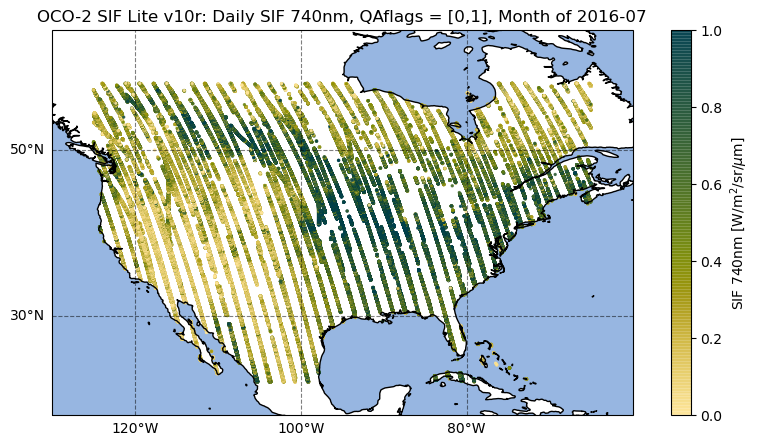

In [6]:
title = f"OCO-2 SIF Lite v10r: Daily SIF 740nm, QAflags = [0,1], Month of 2016-07"
units = "SIF 740nm [W/m$^2$/sr/$\mu$m]"
plot.plot_df(df, "sif", vmin=0, vmax=1, title=title, label=units)

/home/jj829/sif-xco2-cokriging/l2_north_america/../src/plot.py:175: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("bamako_r"))
  cmap.set_bad(color="red")


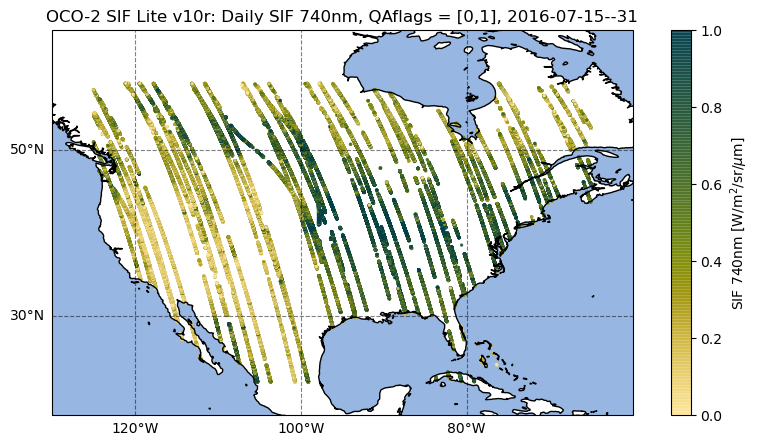

In [12]:
# Reduce to first two weeks
df = df[df["time"] > "2016-07-14"]

title = f"OCO-2 SIF Lite v10r: Daily SIF 740nm, QAflags = [0,1], 2016-07-15--31"
units = "SIF 740nm [W/m$^2$/sr/$\mu$m]"
plot.plot_df(df, "sif", vmin=0, vmax=1, title=title, label=units)